# APW construction

This notebook attempts to illustrate the construction of augmented plane wave (APW) basis. 

An APW take the form as

$$
\phi_{\bf k,G}({\bf r})= 
\begin{cases}
 & {\bf r}\in I \\
\sum_{lm}{A_{\alpha,lm}({\bf k+G})u_l({\bf r},E)} & {\bf r}\in {\bf r}_{\alpha} \\
\end{cases}
$$

The following code takes the following steps to do this

- Setup
- Solve Schrodinger equation in atomic sphere

## Setup

### Parameters

In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
# The lattice constant of a simple cubic lattice
a = 5.0
# The radius of atomic sphere at center of the lattice
rmt = 1.0
# The number of grid points along the diameter of atomic sphere. 
# Use an odd number to take the ends and atomic center into account
npt = 301
# grid point along one dimension in the lattice
ng1d = 51
# plane wave index, in the unit of reciprocal lattice vectors
# the fractional part corresponds to a k-point index
iG = (2,0,0)

### Initialization

Initialize the simple lattice with one atom at its center and the grid points within

In [96]:
# The lattice
latt = [[a, 0.0, 0.0],
           [0.0, a, 0.0],
           [0.0, 0.0, a],]
latt = np.array(latt, dtype='float64')
# The reciprocal lattice
recp = np.linalg.inv(latt) * 2.0 * np.pi
vol = np.linalg.det(latt)
volsq = np.sqrt(vol)

In [97]:
# initialize the uniform mesh grid of lattice
g1d = np.linspace(-a/2, a/2, ng1d)
gx, gy, gz = np.meshgrid(g1d, g1d, g1d)
grids = np.column_stack(list(map(lambda x: x.flatten(), (gx,gy,gz))))
# grid point (x,0,0)
gridsX00 = np.column_stack((g1d, np.zeros(ng1d), np.zeros(ng1d)))

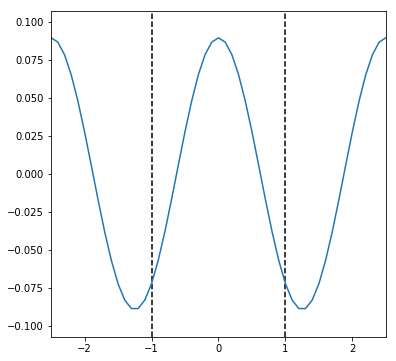

In [98]:
# visualize the plane wave
fig, axs = plt.subplots(figsize=(6,6))
axs.axvline(x=-rmt, linestyle='dashed', color='black')
axs.axvline(x=rmt, linestyle='dashed', color='black')
# draw the atom
axs.set_xlim([-a/2,a/2])
axs.set_ylim([-1.2/volsq,1.2/volsq])

G = np.dot(recp, np.array(iG))
Gdotr = np.dot(gridsX00, G)
pw = np.cos(Gdotr) / volsq
axs.plot(g1d, pw)

##  Solve Schrodinger equation in atomic sphere

The construction of APW requires 

$$a+b=c$$
